In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import skimage.io as io
import numpy as np
import json
from matplotlib.legend import Legend
from matplotlib.lines import Line2D

In [2]:
#Load car-damage-val.json
with open('dataset/val/car-damage-val.json') as f:
    car_damage_val_data = json.load(f)
    
#Load car-damage-val_attributes.json
with open('dataset/val/car-damage-val_attributes.json') as f:
    car_damage_val_attributes_data = json.load(f)
    
#Load val_multiclass.json
with open('dataset/val/val_multiclass.json') as f:
    val_multiclass_data = json.load(f)
    
#Load via_region_data.json
with open('dataset/val/via_region_data.json') as f:
    via_region_data = json.load(f)
    

In [3]:
car_damage_val_data.keys()

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

In [4]:
car_damage_val_data['_via_settings']

{'ui': {'annotation_editor_height': 25,
  'annotation_editor_fontsize': 0.8,
  'leftsidebar_width': 18,
  'image_grid': {'img_height': 80,
   'rshape_fill': 'none',
   'rshape_fill_opacity': 0.3,
   'rshape_stroke': 'yellow',
   'rshape_stroke_width': 2,
   'show_region_shape': True,
   'show_image_policy': 'all'},
  'image': {'region_label': 'name', 'region_label_font': '10px Sans'}},
 'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''},
 'project': {'name': 'car-damage-val'}}

In [5]:
car_damage_val_data['_via_img_metadata']['1.jpg79148']

{'filename': '1.jpg',
 'size': 79148,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [454,
     388,
     364,
     375,
     422,
     495,
     516,
     554,
     539,
     550,
     539,
     521,
     495],
    'all_points_y': [143,
     296,
     424,
     505,
     597,
     633,
     577,
     489,
     349,
     259,
     210,
     166,
     150]},
   'region_attributes': {'name': 'damage'}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [528,
     505,
     392,
     391,
     409,
     432,
     477,
     528,
     560,
     563,
     548,
     537],
    'all_points_y': [622,
     675,
     675,
     712,
     778,
     824,
     822,
     785,
     729,
     688,
     662,
     647]},
   'region_attributes': {'name': 'damage'}}],
 'file_attributes': {}}

In [6]:
car_damage_val_data['_via_attributes']

{'region': {'name': {'type': 'text',
   'description': 'Name of the object',
   'default_value': 'damage'},
  'type': {'type': 'dropdown',
   'description': 'Category of object',
   'options': {'scratch': 'Car Scratch',
    'dent': 'Car Dent',
    'unknown': 'Unknown (damage)'},
   'default_options': {}}},
 'file': {}}

In [7]:
car_damage_val_attributes_data.keys()

dict_keys(['region', 'file'])

In [8]:
car_damage_val_attributes_data['region']

{'name': {'type': 'text',
  'description': 'Name of the object',
  'default_value': 'damage'},
 'type': {'type': 'dropdown',
  'description': 'Category of object',
  'options': {'scratch': 'Car Scratch',
   'dent': 'Car Dent',
   'unknown': 'Unknown (damage)'},
  'default_options': {}}}

In [9]:
car_damage_val_attributes_data['file']

{}

In [10]:
val_multiclass_data['1.jpg79148']

{'filename': '1.jpg',
 'size': 79148,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [185, 187, 288, 412, 506],
    'all_points_y': [4, 143, 143, 88, 6]},
   'region_attributes': {'name': 'headlamp'}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [4,
     192,
     327,
     427,
     519,
     564,
     580,
     596,
     667,
     696,
     671,
     678,
     652,
     642,
     597,
     505,
     454,
     279,
     165,
     91,
     7],
    'all_points_y': [132,
     149,
     139,
     78,
     0,
     14,
     97,
     139,
     139,
     143,
     401,
     460,
     686,
     775,
     819,
     823,
     823,
     820,
     816,
     758,
     749]},
   'region_attributes': {'name': 'rear_bumper'}}],
 'file_attributes': {}}

In [11]:
via_region_data['1.jpg79148']

{'filename': '1.jpg',
 'size': 79148,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [454,
     388,
     364,
     375,
     422,
     495,
     516,
     554,
     539,
     550,
     539,
     521,
     495],
    'all_points_y': [143,
     296,
     424,
     505,
     597,
     633,
     577,
     489,
     349,
     259,
     210,
     166,
     150]},
   'region_attributes': {'name': 'damage'}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [528,
     505,
     392,
     391,
     409,
     432,
     477,
     528,
     560,
     563,
     548,
     537],
    'all_points_y': [622,
     675,
     675,
     712,
     778,
     824,
     822,
     785,
     729,
     688,
     662,
     647]},
   'region_attributes': {'name': 'damage'}}],
 'file_attributes': {}}

In [12]:
def return_color():
    return (np.random.random((1, 3))*0.6+0.4).tolist()[0]

In [53]:
def plot_segments(img_name,img_folder, img_ann):
    """
    This function helps to visualize the dataset

    """
    plt.rcParams["figure.figsize"] = [16,9]
    I = io.imread('{}/{}'.format(img_folder,img_name))
    ax = plt.gca()
    # Display the image
    ax.imshow(I)

    color = []
    polygons = []
    labels =[]
    regions = img_ann['regions']
    custom_lines = list()
    for region in regions:
        poly = list(zip(region['shape_attributes']['all_points_x'],region['shape_attributes']['all_points_y']))
        poly_list = [list(el) for el in poly]
        np_poly = np.array(poly).reshape((len(poly_list),2))
        polygons.append(Polygon(poly))
        random_color = return_color()
        color.append(random_color)
        custom_lines.append(Line2D([0], [0], color=random_color, lw=5))
        labels.append(region['region_attributes']['name'])


    p1 = PatchCollection(polygons, facecolor=color, linewidths=1, alpha=0.4)
    ax.add_collection(p1)
    p2 = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p2)
    ax.legend(custom_lines, labels)

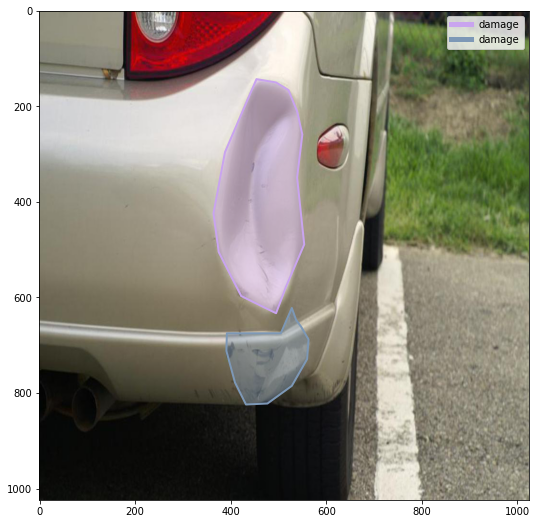

In [54]:
plot_segments("1.jpg",'dataset/val',via_region_data['1.jpg79148'])
plt.show()

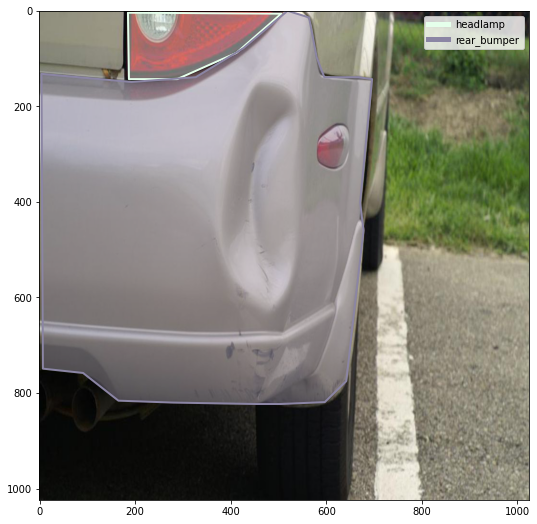

In [55]:
plot_segments("1.jpg",'dataset/val',val_multiclass_data['1.jpg79148'])
plt.show()

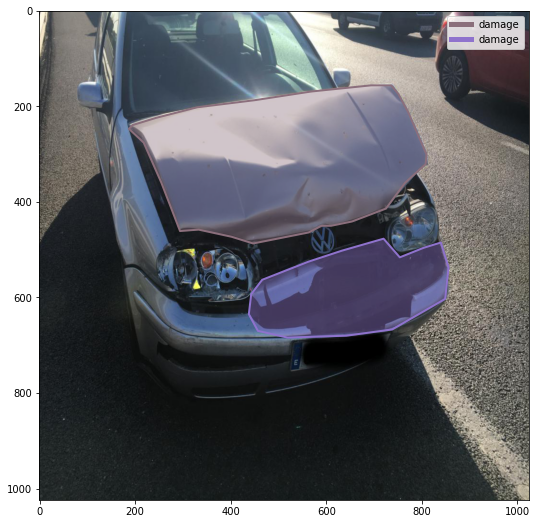

In [56]:
plot_segments("50.jpg",'dataset/val/',via_region_data['50.jpg139156'])
plt.show()

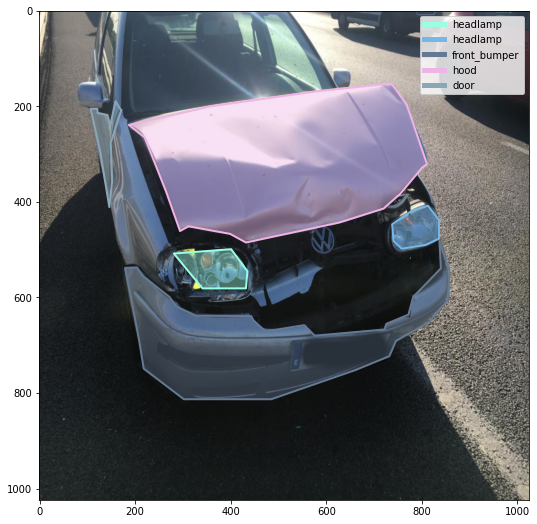

In [58]:
plot_segments("50.jpg",'dataset/val',val_multiclass_data[ '50.jpg139156'])
plt.show()

In [59]:
#Load car-damage-train.json
with open('dataset/train/car-damage-train.json') as f:
    car_damage_train_data = json.load(f)
    
#Load car-damage-val_attributes.json
with open('dataset/train/car-damage-train_attributes.json') as f:
    car_damage_train_attributes_data = json.load(f)
    
#Load val_multiclass.json
with open('dataset/train/train_multiclass.json') as f:
    train_multiclass_data = json.load(f)
    
#Load via_region_data.json
with open('dataset/train/via_region_data.json') as f:
    train_via_region_data = json.load(f)

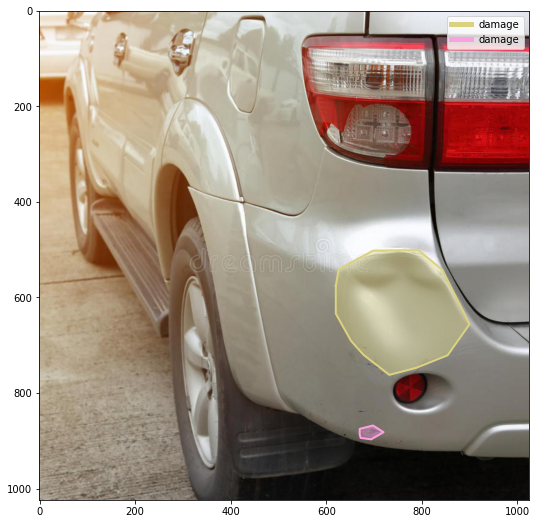

In [60]:
plot_segments("2.jpg",'dataset/train',train_via_region_data['2.jpg94448'])
plt.show()

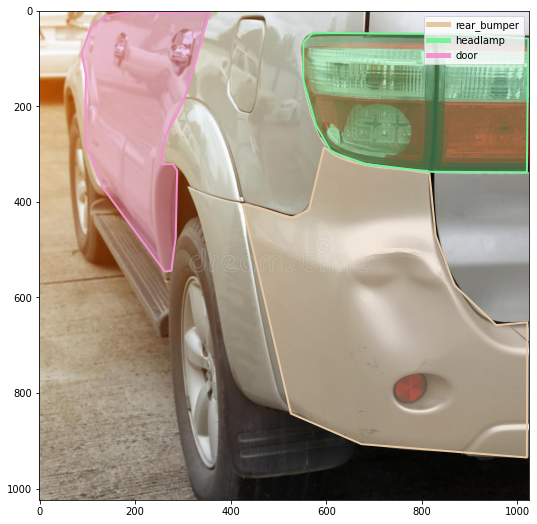

In [61]:
plot_segments("2.jpg",'dataset/train',train_multiclass_data[ '2.jpg94448'])
plt.show()

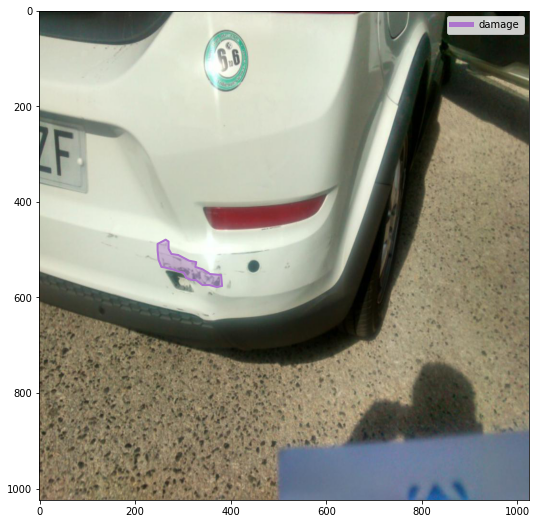

In [64]:
plot_segments("3.jpg",'dataset/train',train_via_region_data['3.jpg100697'])
plt.show()

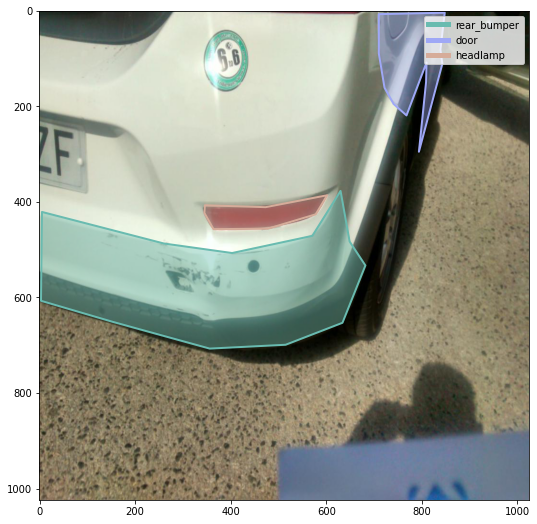

In [65]:
plot_segments("3.jpg",'dataset/train',train_multiclass_data['3.jpg100697'])
plt.show()

### So this seems like a problem statement where only instance segmentation would solve half of the problem. My idea is we can develop two models, which are:
* #### One model to segment the damage which returns the damage polygon(s)
* #### One model to segment the part of car which returns the part polygon(s)
* #### Then we can see which damage ploygons lie inside which part polygon and can detect the damaged part.
* #### There should be an way to train single model that does the two tasks.